# Objective :

"Predict price of Electric vehicle. we can analyse the specifications and predict according to that."

### 1) Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 

### 2) Import Data

In [2]:
electric = pd.read_csv(r"C:\Users\HP\Desktop\Python\Machine Learning\Mini Project\Electric vehicles2\ElectricCarData_Clean.csv")
electric.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [ ]:
def import(data):
    data = pd.read_csv(r"C:\Users\HP\Desktop\Python\Machine Learning\Mini Project\Electric vehicles2\ElectricCarData_Clean.csv")
    return(data)

### Step 2 : Data Pre-Processing

### Univariate analysis

In [3]:
electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [4]:
electric["FastCharge_KmH"]=(electric["FastCharge_KmH"]).replace("-",np.nan).astype(float) 

In [5]:
electric.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,98.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,456.734694,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,201.262897,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,275.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,560.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


In [6]:
electric.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     5
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [7]:
electric["FastCharge_KmH"].fillna(electric["FastCharge_KmH"].mean(),inplace=True)

### 5) Identification and treatment of outliers

<AxesSubplot:>

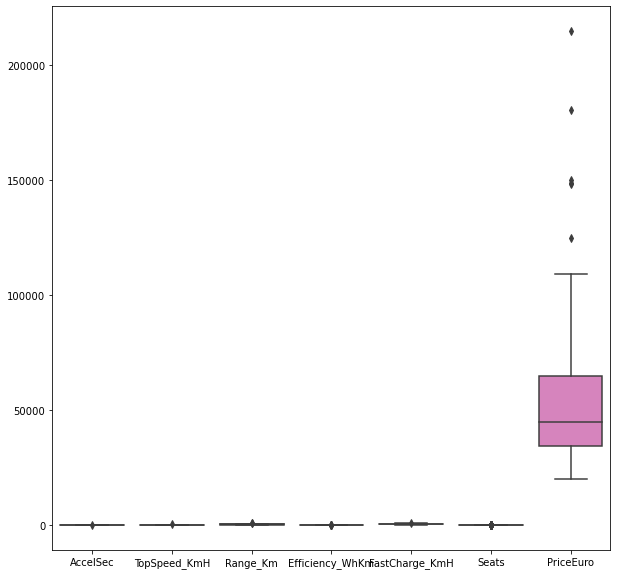

In [8]:
fig, axarr  = plt.subplots(figsize=(10,10))
sns.boxplot(data=electric)

In [9]:
def eliminate_outliers(table):
    a=table.select_dtypes(include=[np.number]).columns.tolist()
    for i in a:
        q1 = table[i].quantile(0.25)
        q3 = table[i].quantile(0.75)
        
        iqr = q3-q1 #Interquartile range

        upper_limit = q3+1.5*iqr 
        lower_limit = q1-1.5*iqr
    
        #print("Upper limit = ",upper_limit)
        #print("Lower limit = ",lower_limit)

        table[i]=np.where(table[i] > upper_limit,upper_limit,table[i]) # upper limit
        table[i]=np.where(table[i] < lower_limit,lower_limit,table[i]) # lower limit
    return(sns.boxplot(data=table))


<AxesSubplot:>

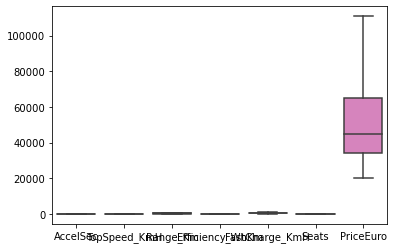

In [10]:
eliminate_outliers(electric)

<AxesSubplot:>

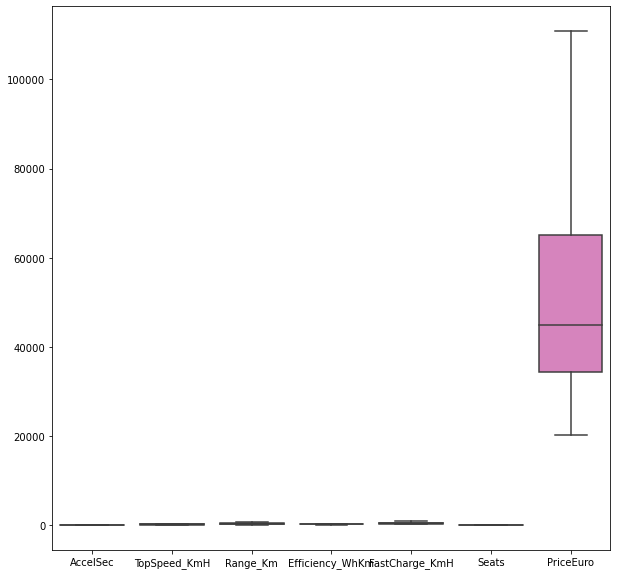

In [11]:
fig, axarr  = plt.subplots(figsize=(10,10))
sns.boxplot(data=electric)

### Visualization

In [12]:
electric.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

<AxesSubplot:xlabel='RapidCharge', ylabel='PriceEuro'>

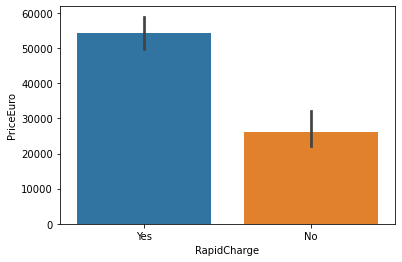

In [13]:
sns.barplot(x = "RapidCharge",y='PriceEuro', data = electric)

<AxesSubplot:xlabel='BodyStyle', ylabel='PriceEuro'>

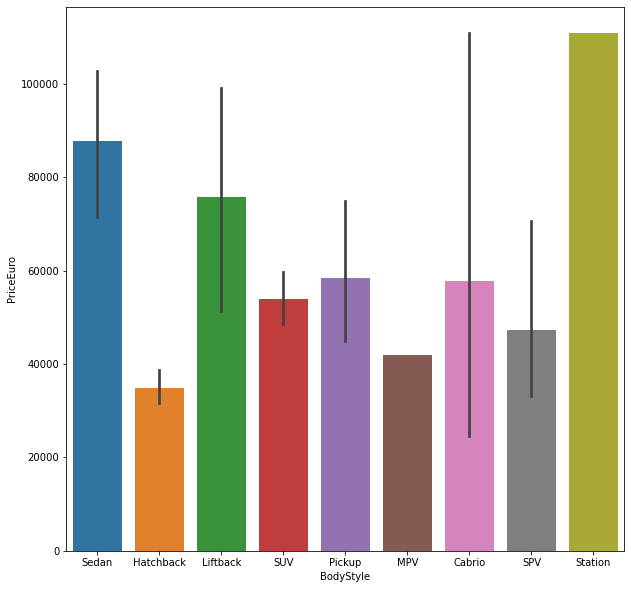

In [14]:
fig, axarr  = plt.subplots(figsize=(10,10))
sns.barplot(x = "BodyStyle",y='PriceEuro', data = electric)

<AxesSubplot:xlabel='PowerTrain', ylabel='PriceEuro'>

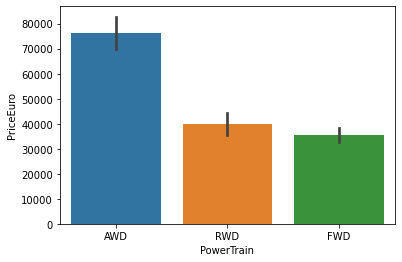

In [15]:

sns.barplot(x = "PowerTrain",y='PriceEuro', data = electric)

<AxesSubplot:xlabel='Range_Km', ylabel='PriceEuro'>

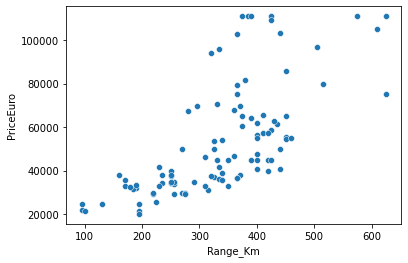

In [16]:
sns.scatterplot(x = "Range_Km",y='PriceEuro', data = electric)

<AxesSubplot:xlabel='AccelSec', ylabel='PriceEuro'>

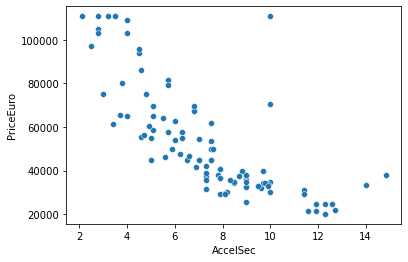

In [17]:
sns.scatterplot(x = "AccelSec",y='PriceEuro', data = electric)

### Taking subset of numerical and qualitative data

In [18]:
electric_num = electric[electric.select_dtypes(include=[np.number]).columns.tolist()]
electric_num.head()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
0,4.6,233.0,450.0,161.0,930.0,5.0,55480.0
1,10.0,160.0,270.0,167.0,250.0,5.0,30000.0
2,4.7,210.0,400.0,181.0,620.0,5.0,56440.0
3,6.8,180.0,360.0,206.0,560.0,5.0,68040.0
4,9.5,145.0,170.0,168.0,190.0,5.0,32997.0


In [19]:
electric_category = electric[electric.select_dtypes(include=["object"]).columns.tolist()]
electric_category.head()

,Brand,Model,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment
0,Tesla,Model 3 Long Range Dual Motor,Yes,AWD,Type 2 CCS,Sedan,D
1,Volkswagen,ID.3 Pure,Yes,RWD,Type 2 CCS,Hatchback,C
2,Polestar,2,Yes,AWD,Type 2 CCS,Liftback,D
3,BMW,iX3,Yes,RWD,Type 2 CCS,SUV,D
4,Honda,e,Yes,RWD,Type 2 CCS,Hatchback,B


### Converting Quality Variable to Number

In [20]:
from sklearn.preprocessing import LabelEncoder
electric_category=electric_category.apply(LabelEncoder().fit_transform)
electric_category.head(3)
# label in ascending order

,Brand,Model,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment
0,30,46,1,0,2,7,3
1,31,33,1,2,2,1,2
2,23,0,1,0,2,2,3


In [21]:
electric = pd.concat([electric_category,electric_num],axis=1)

In [22]:
electric.head()

,Brand,Model,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
0,30,46,1,0,2,7,3,4.6,233.0,450.0,161.0,930.0,5.0,55480.0
1,31,33,1,2,2,1,2,10.0,160.0,270.0,167.0,250.0,5.0,30000.0
2,23,0,1,0,2,2,3,4.7,210.0,400.0,181.0,620.0,5.0,56440.0
3,2,101,1,2,2,6,3,6.8,180.0,360.0,206.0,560.0,5.0,68040.0
4,9,78,1,2,2,1,1,9.5,145.0,170.0,168.0,190.0,5.0,32997.0


### 6) Data Partition

In [23]:
x=electric.drop('PriceEuro', axis = 1)
y=electric[['PriceEuro']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,train_size=0.7,random_state=55)

### 7) Model Building

*  H0 :- There is no Linear relationship between PriceEuro and all the parameters of electric car.

* Vs 

*  H1 :- There is a Linear relationship between PriceEuro and all the parameters of electric car.

Alpha = 0.05 (5%)

In [24]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeRegressor(min_samples_split=20,
                                min_samples_leaf=8,
                                max_depth=3)  
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeRegressor(max_depth=3, min_samples_leaf=8, min_samples_split=20)

In [25]:
train = pd.concat([X_train,y_train],axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 20 to 77
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            72 non-null     int32  
 1   Model            72 non-null     int32  
 2   RapidCharge      72 non-null     int32  
 3   PowerTrain       72 non-null     int32  
 4   PlugType         72 non-null     int32  
 5   BodyStyle        72 non-null     int32  
 6   Segment          72 non-null     int32  
 7   AccelSec         72 non-null     float64
 8   TopSpeed_KmH     72 non-null     float64
 9   Range_Km         72 non-null     float64
 10  Efficiency_WhKm  72 non-null     float64
 11  FastCharge_KmH   72 non-null     float64
 12  Seats            72 non-null     float64
 13  PriceEuro        72 non-null     float64
dtypes: float64(7), int32(7)
memory usage: 6.5 KB


### 8) Prediction on train dataset

In [26]:
train['Predicted']= dt.predict(X_train)
# train.head()

### 9) Model performance matrix

In [27]:
from sklearn import metrics
print(metrics.r2_score(y_train, train.Predicted))

0.8145585134038447


In [28]:
test = pd.concat([X_test,y_test],axis=1)
# test.info()

In [29]:
test['Predicted']= dt.predict(X_test)
# test.head()

In [30]:
print(metrics.r2_score(y_test, test['Predicted']))

0.749544580523871


# Importance Feature

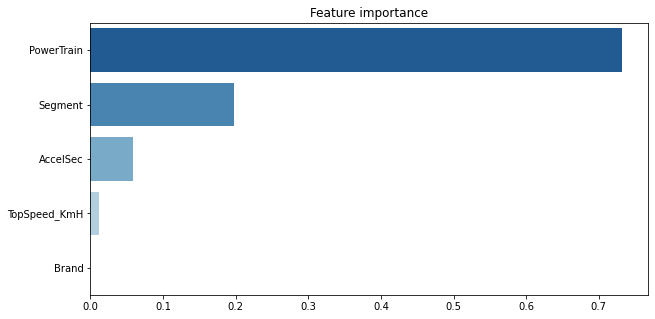

In [31]:
# Plot features importances
imp = pd.Series(data=dt.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')